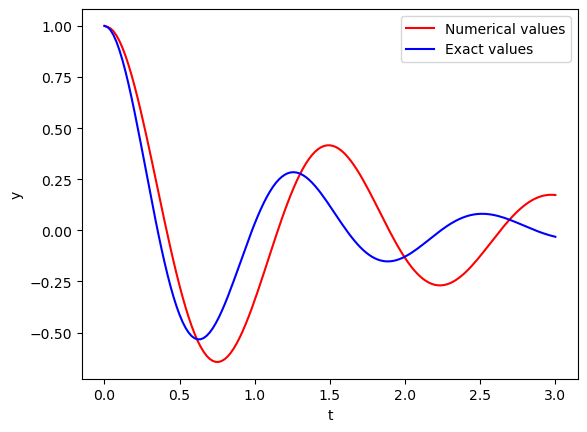

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return np.array([y[1], -2*y[1] - 26*y[0]]) 

def rk4(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2) 
    k4 = h * f(t + h, y + k3)

    return y + (k1 + 2*k2 + 2*k3 + k4)/6

def multistep(y, f, h):
    y0, y1, y2 = y
    return y1 + (h/6)*(f(0, y0) + 4*f(h, y1) + f(2*h, y2))

t = np.arange(0, 3 + 0.02, 0.02)
y_exact = np.exp(-t)*((1/5)*np.sin(5*t) + np.cos(5*t))

y = np.zeros((len(t), 2))
# Initial conditions
# Get accurate y1, y2
y[0,:] = [1, 0] 
y[1,:] = rk4(f, 0, y[0], 0.02) 

for n in range(2, len(t)):
    y[n] = multistep(y[n-2:n+1], f, 0.02) 

plt.plot(t, y[:,0], 'r-') 
plt.plot(t, y_exact, 'b-')
plt.xlabel('t')
plt.ylabel('y')
plt.legend(['Numerical values', 'Exact values'])